In [23]:
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd # To create GeodataFrame
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
neighborhoods = pd.read_pickle('pickles/utseus-cendus-shanghai-neighborhoods.pk')

In [5]:
neighborhoods_gdf = gpd.GeoDataFrame(neighborhoods, geometry='geometry')
neighborhoods_gdf.crs='+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

In [6]:
poly = neighborhoods_gdf['geometry'][0]

In [7]:
def recreate_polygon(poly):
    x,y = poly.exterior.coords.xy
    p = []
    for i in range(0,len(x)):
        p.append((x[i],y[i]))
    return Polygon(p)

In [8]:
ngdf = neighborhoods_gdf

In [9]:
ngdf['new_geometry'] = ngdf['geometry'].apply(recreate_polygon)

In [10]:
neighborhoods_gdf = gpd.GeoDataFrame(ngdf['new_geometry'], geometry='new_geometry')
neighborhoods_gdf

,new_geometry
0,"POLYGON ((121.42168 30.68471, 121.42267 30.684..."
1,"POLYGON ((121.41199 30.69374, 121.41270 30.693..."
2,"POLYGON ((121.40163 30.70717, 121.40181 30.707..."
3,"POLYGON ((121.33687 30.73806, 121.33788 30.734..."
4,"POLYGON ((121.25143 30.79177, 121.25256 30.791..."
5,"POLYGON ((121.36179 30.80039, 121.36191 30.800..."
6,"POLYGON ((121.19465 30.81453, 121.19492 30.814..."
7,"POLYGON ((121.29682 30.81891, 121.29732 30.819..."
8,"POLYGON ((121.36713 30.84311, 121.36733 30.843..."
9,"POLYGON ((121.17453 30.87610, 121.17479 30.874..."


In [13]:
green_df = pd.read_pickle('beijinglab-china-park-WGS84.pk')

In [14]:
green_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
0,0.959651,67.456766,0.033348,DJS,三亚,1.0,"POLYGON ((109.51564 18.24999, 109.51558 18.249..."
1,0.883320,125.710503,0.098123,DJS,三亚,2.0,"POLYGON ((109.51588 18.25020, 109.51580 18.250..."
2,0.904170,183.740488,0.219634,DJS,三亚,3.0,"POLYGON ((109.51427 18.25056, 109.51421 18.250..."
3,0.794660,138.804936,0.096820,DJS,三亚,4.0,"POLYGON ((109.51573 18.25162, 109.51577 18.251..."
4,0.791497,301.658463,0.453649,DJS,三亚,5.0,"POLYGON ((109.51612 18.25291, 109.51606 18.252..."


In [15]:
shanghai_df = green_df[green_df['Name_City'] == '上海']

In [16]:
shanghai_df.head()

,LSI,P_Parkm,A_Parkha,Level_City,Name_City,ID,geometry
5639,0.848377,435.777710,1.087673,ZXS,上海,5640.0,"POLYGON ((121.38269 31.00377, 121.38249 31.003..."
5640,0.601464,3129.668409,28.197212,ZXS,上海,5641.0,"POLYGON ((121.36848 31.00861, 121.36889 31.007..."
5642,0.751825,1019.227261,4.672676,ZXS,上海,5643.0,"POLYGON ((121.41139 31.00517, 121.40852 31.004..."
5644,0.893361,378.382838,0.909299,ZXS,上海,5645.0,"POLYGON ((121.40655 31.01237, 121.40608 31.012..."
5646,0.718404,1276.784738,6.695195,ZXS,上海,5647.0,"POLYGON ((121.42184 31.01051, 121.42034 31.009..."


In [24]:
shanghai_gdf = gpd.GeoDataFrame(shanghai_df, geometry='geometry')
shanghai_gdf.crs = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs'

ImportError: The descartes package is required for plotting polygons in geopandas.

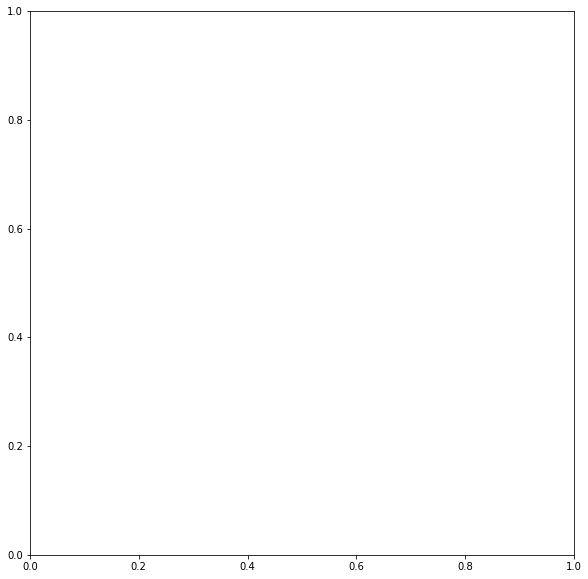

In [25]:
shanghai_gdf.plot(figsize=(15,10))

In [ ]:
neighborhoods_gdf['green_area'] = 0.0

for i,poly in neighborhoods_gdf.iterrows():
    for park_poly in shanghai_gdf['geometry']:
        if poly['new_geometry'].intersects(park_poly):
            try:
                neighborhoods_gdf.at[i, "green_area"] += poly['new_geometry'].intersection(park_poly).area
                print(neighborhoods_gdf.at[i, "green_area"],poly['new_geometry'].intersection(park_poly).area)
            except:
                pass

In [27]:
neighborhoods_gdf['green_area_proportion'] = neighborhoods_gdf['green_area']/neighborhoods_gdf['new_geometry'].area

In [28]:
neighborhoods_gdf[neighborhoods_gdf['green_area_proportion']>0]

,new_geometry,green_area,green_area_proportion
35,"POLYGON ((121.44356 31.00937, 121.44338 31.009...",7.627039e-05,0.026719
47,"POLYGON ((121.38734 31.03991, 121.38699 31.040...",1.077160e-06,0.000759
48,"POLYGON ((121.42360 31.07339, 121.42303 31.073...",3.590252e-06,0.001591
50,"POLYGON ((121.45789 31.10380, 121.45879 31.101...",3.736795e-05,0.010517
53,"POLYGON ((121.46062 31.11422, 121.46045 31.113...",5.755328e-05,0.083765
57,"POLYGON ((121.38959 31.13059, 121.39048 31.130...",1.171583e-04,0.064768
60,"POLYGON ((121.40699 31.14254, 121.40700 31.142...",1.014359e-04,0.041333
61,"POLYGON ((121.42383 31.14864, 121.42384 31.148...",2.264482e-06,0.006688
62,"POLYGON ((121.45392 31.15022, 121.45379 31.150...",7.461167e-05,0.134284
66,"POLYGON ((121.38198 31.15897, 121.38235 31.157...",3.281975e-06,0.006219


In [29]:
neighborhoods_gdf.to_pickle("pickles/savedDF_greenspace_per_district.pkl")